In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import datetime
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("../data/SnowData.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df

,Unnamed: 0,Date,Station Name,Snow Water Equivalent (in) Start of Day Values,Change In Snow Water Equivalent (in),Snow Depth (in) Start of Day Values,Change In Snow Depth (in),Elevation (ft),Air Temperature Average (degF),Latitude,Longitude,County Name
0,0,2000-01-01,Apishapa,4.1,0.4,12.0,0.0,10000,24.0,37.33062,-105.06749,Huerfano
1,1,2000-01-02,Apishapa,4.1,0.0,12.0,0.0,10000,18.0,37.33062,-105.06749,Huerfano
2,2,2000-01-03,Apishapa,4.1,0.0,12.0,0.0,10000,6.0,37.33062,-105.06749,Huerfano
3,3,2000-01-04,Apishapa,4.1,0.0,15.0,3.0,10000,21.0,37.33062,-105.06749,Huerfano
4,4,2000-01-05,Apishapa,4.5,0.4,14.0,-1.0,10000,24.0,37.33062,-105.06749,Huerfano
...,...,...,...,...,...,...,...,...,...,...,...,...
814973,814973,2021-05-13,Zirkel,10.3,0.2,21.0,2.0,9340,46.0,40.79488,-106.59535,Jackson
814974,814974,2021-05-14,Zirkel,8.4,-1.9,18.0,-3.0,9340,45.0,40.79488,-106.59535,Jackson
814975,814975,2021-05-15,Zirkel,7.2,-1.2,17.0,-1.0,9340,46.0,40.79488,-106.59535,Jackson
814976,814976,2021-05-16,Zirkel,6.1,-1.1,15.0,-2.0,9340,45.0,40.79488,-106.59535,Jackson


In [3]:
# convert date to numaric day of the year
dates=df['Date'].astype('datetime64[ns]')
dates=dates.dt.dayofyear
df['Date']=dates
df

,Unnamed: 0,Date,Station Name,Snow Water Equivalent (in) Start of Day Values,Change In Snow Water Equivalent (in),Snow Depth (in) Start of Day Values,Change In Snow Depth (in),Elevation (ft),Air Temperature Average (degF),Latitude,Longitude,County Name
0,0,1,Apishapa,4.1,0.4,12.0,0.0,10000,24.0,37.33062,-105.06749,Huerfano
1,1,2,Apishapa,4.1,0.0,12.0,0.0,10000,18.0,37.33062,-105.06749,Huerfano
2,2,3,Apishapa,4.1,0.0,12.0,0.0,10000,6.0,37.33062,-105.06749,Huerfano
3,3,4,Apishapa,4.1,0.0,15.0,3.0,10000,21.0,37.33062,-105.06749,Huerfano
4,4,5,Apishapa,4.5,0.4,14.0,-1.0,10000,24.0,37.33062,-105.06749,Huerfano
...,...,...,...,...,...,...,...,...,...,...,...,...
814973,814973,133,Zirkel,10.3,0.2,21.0,2.0,9340,46.0,40.79488,-106.59535,Jackson
814974,814974,134,Zirkel,8.4,-1.9,18.0,-3.0,9340,45.0,40.79488,-106.59535,Jackson
814975,814975,135,Zirkel,7.2,-1.2,17.0,-1.0,9340,46.0,40.79488,-106.59535,Jackson
814976,814976,136,Zirkel,6.1,-1.1,15.0,-2.0,9340,45.0,40.79488,-106.59535,Jackson


In [4]:
samp_df=df.sample(frac=0.4, replace=True, random_state=1)
samp_df


,Unnamed: 0,Date,Station Name,Snow Water Equivalent (in) Start of Day Values,Change In Snow Water Equivalent (in),Snow Depth (in) Start of Day Values,Change In Snow Depth (in),Elevation (ft),Air Temperature Average (degF),Latitude,Longitude,County Name
247379,247379,202,Butte,0.0,0.0,9.0,9.0,10160,64.0,38.89433,-106.95300,Gunnison
640518,640518,316,Nast Lake,0.0,0.0,0.0,0.0,8700,36.0,39.29722,-106.60694,Pitkin
619550,619550,181,Hoosier Pass,0.0,0.0,0.0,0.0,11400,48.0,39.36127,-106.05978,Summit
640025,640025,188,Moon Pass,0.0,0.0,0.0,0.0,11140,57.0,37.96661,-106.55837,Saguache
518737,518737,5,Chapman Tunnel,5.5,0.2,30.0,3.0,10110,2.0,39.26217,-106.62931,Pitkin
...,...,...,...,...,...,...,...,...,...,...,...,...
351071,351071,229,Bison Lake,0.0,0.0,0.0,0.0,10880,56.0,39.76487,-107.35681,Garfield
781258,781258,31,Jones Pass,9.5,0.2,40.0,2.0,10400,17.0,39.76450,-105.90623,Grand
555929,555929,332,Molas Lake,3.1,0.0,16.0,0.0,10500,20.0,37.74932,-107.68866,San Juan
117626,117626,55,Ute Creek,4.8,0.0,32.0,1.0,10650,15.0,37.61497,-105.37327,Costilla


In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'Station Name',
       'Snow Water Equivalent (in) Start of Day Values',
       'Change In Snow Water Equivalent (in)',
       'Snow Depth (in) Start of Day Values', 'Change In Snow Depth (in)',
       'Elevation (ft)', 'Air Temperature Average (degF)', 'Latitude',
       'Longitude', 'County Name'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

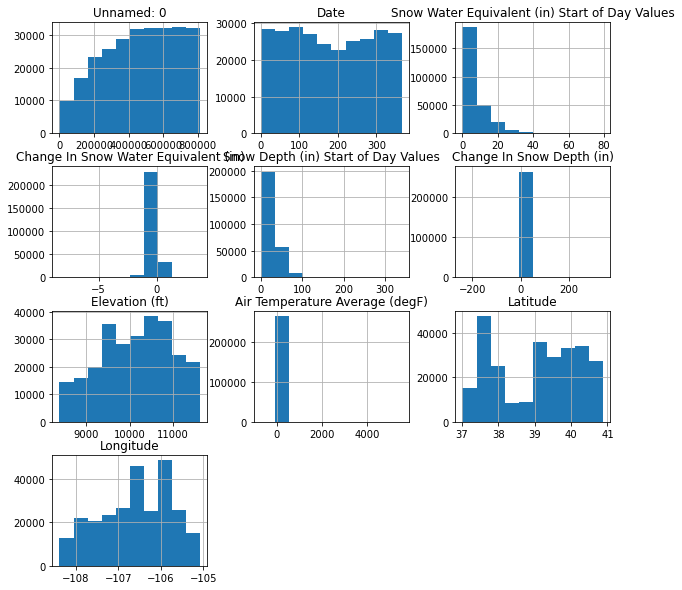

In [32]:
df.hist(figsize=(10,10))
plt.show

In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'Station Name',
       'Snow Water Equivalent (in) Start of Day Values',
       'Change In Snow Water Equivalent (in)',
       'Snow Depth (in) Start of Day Values', 'Change In Snow Depth (in)',
       'Elevation (ft)', 'Air Temperature Average (degF)', 'Latitude',
       'Longitude', 'County Name'],
      dtype='object')

# Select your features (columns)

In [7]:
# 'Change In Snow Water Equivalent (in)',

In [5]:
# Set features. This will also be used as your x values.
xdf = samp_df[['Date', 'Station Name',
       'Snow Water Equivalent (in) Start of Day Values',
       'Snow Depth (in) Start of Day Values',
       'Elevation (ft)', 'Air Temperature Average (degF)', 'Latitude',
       'Longitude']]
xdf

,Date,Station Name,Snow Water Equivalent (in) Start of Day Values,Snow Depth (in) Start of Day Values,Elevation (ft),Air Temperature Average (degF),Latitude,Longitude
247379,202,Butte,0.0,9.0,10160,64.0,38.89433,-106.95300
640518,316,Nast Lake,0.0,0.0,8700,36.0,39.29722,-106.60694
619550,181,Hoosier Pass,0.0,0.0,11400,48.0,39.36127,-106.05978
640025,188,Moon Pass,0.0,0.0,11140,57.0,37.96661,-106.55837
518737,5,Chapman Tunnel,5.5,30.0,10110,2.0,39.26217,-106.62931
...,...,...,...,...,...,...,...,...
351071,229,Bison Lake,0.0,0.0,10880,56.0,39.76487,-107.35681
781258,31,Jones Pass,9.5,40.0,10400,17.0,39.76450,-105.90623
555929,332,Molas Lake,3.1,16.0,10500,20.0,37.74932,-107.68866
117626,55,Ute Creek,4.8,32.0,10650,15.0,37.61497,-105.37327


In [9]:
xdf.dtypes

Date                                                int64
Station Name                                       object
Snow Water Equivalent (in) Start of Day Values    float64
Snow Depth (in) Start of Day Values               float64
Elevation (ft)                                      int64
Air Temperature Average (degF)                    float64
Latitude                                          float64
Longitude                                         float64
dtype: object

In [10]:
# xdf['Date'] = pd.to_numeric(df.Date.str.replace('-',''))
# xdf

In [6]:
one_hot = pd.get_dummies(xdf['Station Name'])
# Drop column as it is now encoded
data_df = xdf.drop('Station Name',axis = 1)
# Join the encoded df
data_df = data_df.join(one_hot)
data_df 

,Date,Snow Water Equivalent (in) Start of Day Values,Snow Depth (in) Start of Day Values,Elevation (ft),Air Temperature Average (degF),Latitude,Longitude,Apishapa,Arapaho Ridge,Bear Lake,...,Vail Mountain,Vallecito,Wager Gulch,Weminuche Creek,Whiskey Ck,Wild Basin,Willow Creek Pass,Willow Park,Wolf Creek Summit,Zirkel
8,9,4.6,14.0,10000,15.0,37.33062,-105.06749,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15,16,5.0,13.0,10000,41.0,37.33062,-105.06749,1,0,0,...,0,0,0,0,0,0,0,0,0,0
25,26,4.6,8.0,10000,28.0,37.33062,-105.06749,1,0,0,...,0,0,0,0,0,0,0,0,0,0
25,26,4.6,8.0,10000,28.0,37.33062,-105.06749,1,0,0,...,0,0,0,0,0,0,0,0,0,0
25,26,4.6,8.0,10000,28.0,37.33062,-105.06749,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814960,120,14.0,30.0,9340,50.0,40.79488,-106.59535,0,0,0,...,0,0,0,0,0,0,0,0,0,1
814963,123,10.8,27.0,9340,30.0,40.79488,-106.59535,0,0,0,...,0,0,0,0,0,0,0,0,0,1
814963,123,10.8,27.0,9340,30.0,40.79488,-106.59535,0,0,0,...,0,0,0,0,0,0,0,0,0,1
814963,123,10.8,27.0,9340,30.0,40.79488,-106.59535,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
# one_hot = pd.get_dummies(data_df['County Name'])
# # Drop column as it is now encoded
# clean_df = data_df.drop('County Name',axis = 1)
# # Join the encoded df
# clean_df = clean_df.join(one_hot)
# clean_df 

In [48]:
#sleecting just the first 100 rows
# testing_df= clean_df.iloc[range(0,30000)]
# testing_df

In [49]:
# Does clean df include snowdepth? for code below?
# test2_df=clean_df.sample(frac=0.5, replace=True, random_state=1)
# test2_df

# Create a Train Test Split

Use "Change In Snow Depth (in)" for the y values

In [63]:
X =data_df
y = df["Change In Snow Depth (in)"].values.reshape(-1, 1)
print(X.shape, y.shape)
# y

(372266, 122) (106339, 1)


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [1274534, 265848]

In [78]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(344529, 159) (114844, 159) (344529, 1) (114844, 1)


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [57]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [114]:
# Scale your data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_train_scaled.shape

(344529, 159)

In [106]:
X_train_scaled_1 = X_scaler.transform(X_train)
X_test_scaled_1 = X_scaler.transform(X_test)
X_train_scaled_1.shape

(344529, 159)

# Train the Model



In [59]:
from tensorflow.keras.utils import to_categorical

In [119]:
# y_scaler = MinMaxScaler().fit(y_train)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)
# y_train_scaled.shape

In [107]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical.shape

(344529, 199)

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [116]:
model = Sequential()
model.add(Dense(units=159, activation='relu', input_dim=2))
model.add(Dense(units=199, activation='softmax'))


In [117]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [118]:
model.fit(
    X_train_scaled_1,
    y_train_categorical,
    epochs=10,
    shuffle=True,
    verbose=2
)

Epoch 1/10


ValueError: in user code:

    C:\Users\tiij8\anaconda3\envs\PythonAdv\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\tiij8\anaconda3\envs\PythonAdv\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\tiij8\anaconda3\envs\PythonAdv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\tiij8\anaconda3\envs\PythonAdv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\tiij8\anaconda3\envs\PythonAdv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\tiij8\anaconda3\envs\PythonAdv\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\tiij8\anaconda3\envs\PythonAdv\lib\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    C:\Users\tiij8\anaconda3\envs\PythonAdv\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\tiij8\anaconda3\envs\PythonAdv\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_5 is incompatible with the layer: expected axis -1 of input shape to have value 2 but received input with shape (None, 159)


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model

# from sklearn.model_selection import GridSearchCV
# param_grid = {'C': [1, 5, 10, 50],
#               'gamma': [0.0001, 0.0005, 0.001, 0.005]}
# grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
# Train the model with GridSearch
# grid.fit(X_train, y_train)

In [ ]:
# print(grid.best_params_)
# print(grid.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)